# TO-DO

* ~Fazer boxplot da seção 2~ (1/11/2023)
* ~Corrigir as informações de conclusão da seção 2~ (1/11/2023)
* ~Começar a seção 3~ (1/11/2023)
* ~Montar subplot com todos os gráficos dos votos anulados (2/11/2023)
* Iniciar seção 4 (2/11/2023)
* Fazer tabela pivô com a tabela de votos brancos e nulos por bairro


* **Adicionar sumário ao EDA e ao outro arquivo**

# Eleições presidenciais de 2022 em Nova Friburgo - Uma EDA explicativa

In [1]:
print('Código (clique aqui)')

# bibliotecas que serão utilizadas aqui
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os 
from matplotlib.patches import Patch
import dtype_diet as dtd


# algumas constantes que usarei ao longo do código
ELEITORES_APTOS = 155071
VOTOS_POR_TURNO_1 = 119359
VOTOS_POR_TURNO_2 = 121288

Código (clique aqui)


In [2]:
print('Código (clique aqui)')

# importando o dataset já tratado
df = pd.read_excel('dataset_eleicoes.xlsx')

Código (clique aqui)


In [3]:
df_1 = df
proposta = dtd.report_on_dataframe(df_1)
df_1 = dtd.optimize_dtypes(df_1, proposta)

# Contexto dos dados:

## Notas sobre a interpretação dos dados

* O % de eleitores ausentes será inferido com base no dataset e no número de eleitores aptos que o TSE disponibilizou.
* Não há informações no dataset que sustentem diretamente a anulação dos votos de um determinado candidato - isso será feito *a posteriori.*
* Há uma diferença na compreensão dos dados para alguns cargos. Para deputados federais e estaduais, por exemplo, contabiliza-se tanto o voto nominal (diretamente em um candidato) quanto o voto por legenda (onde o voto vai pro partido). As eleições para esses cargos seguem uma lógica um pouco diferente, sendo eleitos pelo chamado "Voto proporcional". Os outros cargos seguem o voto nominal absoluto, onde os votos nominais são a única regra.
* Outro ponto é a questão de eleitores que se encontram FORA do Estado do Rio de Janeiro. Quem se encontra dentro do estado, mas fora de onde o título de eleitor está registrado, ainda há como votar em todos os candidatos; Agora, quem se encontra FORA do Estado pode votar APENAS para presidente. 

## Algumas notas sobre Nova Friburgo

* Nova Friburgo possui 191.158 habitantes, de acordo com o último censo.
* Desse total, há 155.090 eleitores aptos a votar, [de acordo com levantamento do TSE](https://sig.tse.jus.br/ords/dwapr/r/seai/sig-eleicao-comp-abst/home?p0_municipio=NOVA%20FRIBURGO&p0_uf=RJ&session=8040493288379). 
* Isso significa dizer que um pouco mais de 80% da cidade está apta a votar, um bom indicador da saúde eleitoral friburguense.

## Algumas notas sobre os dados

- O dataset usado aqui foi tratado em outro notebook
- Ele é composto das seguintes colunas
    - TURNO
    - ZONA
    - SECAO
    - CARGO
        - 1: Presidente
        - 3: Governador
        - 5: Senador
        - 6: Deputado Federal
        - 7: Deputado Estadual
    - NUMERO
        - '95': Voto em branco
        - '96': Voto nulo
    - VOTOS
    - BAIRRO
    - SIGLA
    - ALINHAMENTO
        - 95 E 96: "Irrelevante"
    - SITUACAO
        - 0: "INAPTO"
        - 1: "APTO"

# Quantos eleitores tivemos nos dois turnos, contando os votos nulos e brancos?

O primeiro dado a levantar é sobre a quantidade de pessoas que participaram das eleições, nos dois turnos. Estarei contabilizando votos nulos e normais, sem distinção. Irei usar as eleições presidenciais como referência para obter a porcentagem (já que temos também os votos em trânsito - votar em trânsito apenas é permitido para presidente; caso contrário, a pessoa precisa estar, pelo menos, no Estado onde o seu título está cadastrado). 

A diferença entre os votos para presidente e os outros cargos foi mínima - em torno dos 100 votos. Portanto, irei ignorar uma análise mais detalhada entre a diferença de votos para cada cargo. Apenas irei analisar a quantidade de votos para cada cargo em termos de votos válidos e nulos; Isso será visto adiante.

* O que será visto?
    - Quantidade de votos totais;
    - Distribuição dos votos totais para cada bairro;
    - Quantidade de votos por bairro;

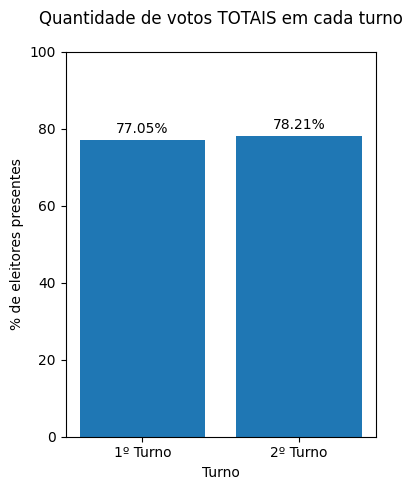

In [4]:
df_qtde = (df[df['CARGO'] == 1]
    .groupby(['TURNO'])['VOTOS']
    .sum() 
    .reset_index())

df_qtde['%'] = (df_qtde['VOTOS'] / ELEITORES_APTOS * 100).round(2)

plt.figure(figsize=(4, 5))
plt.bar(df_qtde['TURNO'], df_qtde['%'])
plt.xlabel('Turno')
plt.ylabel('% de eleitores presentes')
plt.title('Quantidade de votos TOTAIS em cada turno', pad=20)
plt.ylim(0, 100)

turnos = df_qtde['TURNO']
rotulos = ['1º Turno', '2º Turno']
porcentagens = df_qtde['%']
plt.xticks(turnos, rotulos)

[plt.text(x, y + 1, f"{valor:.2f}%", ha='center', va='bottom') 
 for x, y, valor in zip(turnos, porcentagens, porcentagens)]

plt.show()

## O que podemos concluir dessa parte?

* A variação de votos entre um turno e outro ficou na casa dos 1%. 
* A quantidade de eleitores ausentes bateu na casa dos 22%. 
* Houveram 110 votos em trânsito (fora do município e estado de origem).
* A quantidade de votos em trânsito teve impacto praticamente nulo.
* A princípio, a assiduidade do friburguense com relação as urnas é boa, mas teremos que ver mais a fundo outros índices

# Análise da distribuição dos votos

Parte importante da análise dos votos totais, precisamos entender como foi a votação para cada bairro; se foi uma distribuição uniforme ou assimétrica, bairros que mais influenciam e menos influenciam, etc.



AttributeError: 'Axes' object has no attribute 'tight_layout'

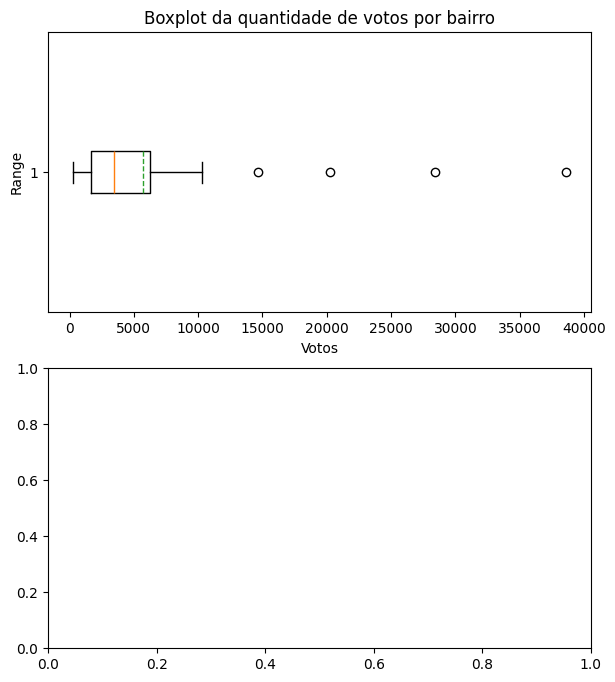

In [5]:
df_bairro = df
df_bairro = df_bairro[df_bairro['CARGO'] == 1]
df_bairro = df_bairro.groupby('BAIRRO')['VOTOS'].sum().to_frame().reset_index().sort_values(by='VOTOS')

# Primeiro quero saber quantos bairros votaram
df_bairro['BAIRRO'].nunique() #42 bairros

# Obviamente, são muitos bairros para representar em um gráfico, as informações ficariam difíceis de compreender.
# Portanto, irei agrupar os dados em intervalos iguais. Precisei de um boxplot para entender a dsitribuição preliminar dos 
# número e a partir daí, elaborei um histograma para entender a quantidade de repetições de números em um determinado 
# intervalo.

# O método escolhido para determinar uma quantidade mínima de intervalos é a Regra de Sturges:
# h = 1 + log2(n), onde 'h' é a quantidade de intervalos e n é a quantidade da amostra. Como a quantidade de outliers é baixa 
# e precisamos dos outliers, adotei 10 'bins' para poder representar o gráfico de forma adequada e sem muita perda de dados

n_S = len(df_bairro['VOTOS']) # 42
h_S = int(round(1 + np.log2(n_S))) # 6
intervalos_S = pd.cut(df_bairro['VOTOS'], bins=h_S)

intervalos_S = [intervalo.left for intervalo in intervalos_S]

fig, axs = plt.subplots(2, 1, figsize=(7, 8))

axs[0].boxplot(df_bairro['VOTOS'], vert=False, showmeans=True, meanline=True)
axs[0].set_title("Boxplot da quantidade de votos por bairro")
axs[0].set_xlabel('Votos')
axs[0].set_ylabel('Range')

axs[0].tight_layout()
axs[0].show()

axs[1].hist(df_bairro['VOTOS'], bins=10, edgecolor='k', alpha=0.7, color='blue')
axs[1].set_xlim(0, 40000)
axs[1].set_title("Histograma da frequência de votos por bairro")
axs[1].set_xlabel('Quantidade')
axs[1].set_ylabel('Frequência')

axs[1].tight_layout()
axs[1].show()



## Informações obtidas acima:

- Há uma distribuição assimétrica a direita, com muitos valores altos.
- Há alguns outliers, indo dos 10 mil votos aos quase 40 mil votos;
- O histograma apontou que a frequência de valores menores que 10 mil é altíssima, indicando que poucas seções eleitorais em Nova Friburgo podem influenciar muito em uma eleição (preciso fazer teste de hipótese pra comprovar isso)

# Análise pelos bairros

Agora, é hora de analisar a distribuição bairro a bairro, para entermos a concentração de votos.

Como a distribuição foi assimétrica e puxada pra direita, pensei em fazer um Pareto para verificar uma situação - se 80% dos votos podem estar concentrados em 20% dos bairros de Nova Friburgo. Além disso, também irei fazer uma verificação para os bairros que **menos** tiveram votos. 

In [ ]:
df_bairro = df_bairro.sort_values(by='VOTOS', ascending=False)
df_bairro['%'] = (df_bairro['VOTOS'] / ELEITORES_APTOS) * 100
df_bairro['CUMULATIVA'] = df_bairro['%'].cumsum()

topo = df_bairro.head(10)
fundo = df_bairro.tail(10)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(9, 7))

cores = ['orange' if c < 80 else 'blue' for c in topo['CUMULATIVA']]
legendas = ['Classe A' if c < 80 else 'Classe B' for c in topo['CUMULATIVA']]
custom_legend = [Patch(color='orange', label='Dentro dos 80%'), Patch(color='blue', label='Fora dos 80%')]

ax1.barh(topo['BAIRRO'], topo['VOTOS'], color=cores)
ax1.set_xlabel('Quantidade de Votos')
ax1.set_title('10 bairros com MAIOR quantidade de votantes')
ax1.invert_yaxis()
ax1.legend(handles=custom_legend)
ax1.yaxis.grid(False)
ax1.xaxis.grid(True, linestyle='--', linewidth=0.3, alpha=1)


ax2.barh(fundo['BAIRRO'], fundo['VOTOS'], color='grey')
ax2.set_xlabel('Quantidade de Votos')
ax2.set_title('10 bairros com MENOR quantidade de votantes')
ax2.yaxis.grid(False)
ax2.xaxis.grid(True, alpha=0.1)

plt.tight_layout()
plt.show()

## O que podemos concluir?

* Analisando pelo Pareto, podemos concluir que 6 bairros detém 80% dos votos da cidade.
* Quando olhamos essas informações, podemos perceber que 1/7 dos bairros com seções são responsáveis pela esmagadora maior parte dos votos
* Agora, se olhássemos pela quantidade total de bairros em Friburgo, temos que possivelmente muitos bairros votam em poucas seções (já que há muitos bairros sem seções eleitorais - Vale Dos Pinheiros, Lagoinha, Bocaina, Santa Luzia, etc).
* Olhando o gráfico de baixo, podemos ver que a soma de todos os bairros ali consegue chegar perto do 6º lugar (Vila Nova), mas não ultrapassa ou sequer se iguala.
* Há informações que poderiam nos ajudar a cravar uma correlação estatisticamente mais precisa, como distância do centro da cidade, PIB, etc, mas vou me ater a informações prévias sobre Nova Friburgo. Os bairros citados no segundo gráfico possuem uma distância considerável do Centro da cidade, sendo alguns quase fora do perímetro urbano. Muitos ali, como Pilões, São Lourenço, etc, são bairros predominantemente rurais, com baixa densidade demográfica. Já os bairros do primeiro gráfico estão bem no centro da malha urbana de Nova Friburgo - sendo Olaria e Conselheiro considerados os maiores bairros fora o Centro. Futuramente pretendo inserir mais features no dataset, com informações do tipo, para elaborar testes estatísticos confirmando a hipótese.

# Levantamento de votos brancos e nulos, por turno

Acima entendemos quantos eleitores foram até as urnas votar, agora é hora de vermos os números dos votos não válidos - aqueles que ou são nulos ou brancos. É um levantamento importante porque saber a % de pessoas que votaram nessas duas opções para cada cargo e cada turno pode levar a elaboração de estratégias mais eficientes para angariar esses votos.

A plotagem dos gráficos terá a seguinte lógica: Como no RJ as eleições do segundo turno foram APENAS para presidente, irei fazer dois gráficos - um que seja voltado apenas para presidentes, em ambos os turnos, e outro com todos os cargos que concorreram apenas no primeiro turno.

Também quero entender como os votos estão distribuídos, como é a cara deles, através de um boxplot, de ambos os turnos. Vou fazer alguma coisa relativa aos outliers? Dependendo do meu objetivo, sim.

Os números a seguir serão **apenas** dos votos "puramente" brancos e nulos. Na contagem do TSE, os votos anulados sub júdice contam dentro da porcentagem total de votos nulos; não vou por essa abordagem pelo seguinte fato: Nessa parte da EDA, quero saber **apenas** da relação vinda das isenções e erros nas urnas. Os votos anulados sub judice serão analisados em outro momento.

In [7]:
print('Código (clique aqui)')

df_1 = df

df_votos = df_1.loc[df_1['NUMERO'].isin([95, 96])].groupby(['CARGO', 'TURNO', 'NUMERO'])['VOTOS'].sum().reset_index()
df_votos['%'] = ((df_votos['VOTOS'] / VOTOS_POR_TURNO_1) * 100).round(2)

mapeamento_cargo = {3: 'Governador', 5: 'Senador', 6: 'Dep. Federal', 7: 'Dep. Estadual'}

df_votos_1 = df_votos.drop('VOTOS', axis=1)
cond = (df_votos['TURNO'] == 1) & (df_votos['CARGO'] != 1)
df_votos_1 = df_votos[cond]

df_95 = df_votos_1[df_votos_1['NUMERO'] == 95].copy()
df_96 = df_votos_1[df_votos_1['NUMERO'] == 96].copy()

media_brancos = df_95['%'].mean()

Q1 = df_votos_1['%'].quantile(0.25)
Q3 = df_votos_1['%'].quantile(0.75)
IQR = Q3 - Q1

limite_superior = Q3 + 1.5 * IQR
limite_inferior = Q1 - 1.5 * IQR

df_sem_outliers = df_votos_1[(df_votos_1['%'] >= limite_inferior) & (df_votos_1['%'] <= limite_superior)]

media_nulos = df_sem_outliers['%'].mean()

df_95['NOME_CARGO'] = df_votos_1['CARGO'].map(mapeamento_cargo)
df_96['NOME_CARGO'] = df_votos_1['CARGO'].map(mapeamento_cargo)


df_votos_p = df_1.loc[df_1['NUMERO'].isin([95, 96])].groupby(['CARGO', 'TURNO', 'NUMERO'])['VOTOS'].sum().reset_index()
df_votos_p['%'] = ((df_votos_p['VOTOS'] / VOTOS_POR_TURNO_2) * 100).round(2)

df_votos_2 = df_votos_p.drop('VOTOS', axis=1)
cond = (df_votos_p['TURNO'] == 2)
df_votos_2 = df_votos_p[cond]
cond_2 = (df_votos['CARGO'] == 1)
df_votos_2 = df_votos[cond_2]
df_votos_2 = df_votos_2.drop(['TURNO', 'CARGO'], axis=1)

df_95_2 = df_votos_2[df_votos_2['NUMERO'] == 95]
df_96_2 = df_votos_2[df_votos_2['NUMERO'] == 96]

posicoes = range(len(df_95_2))
largura = 0.3

media_brancos_2 = df_95_2['%'].mean()
media_nulos_2 = df_96_2['%'].mean()

Código (clique aqui)


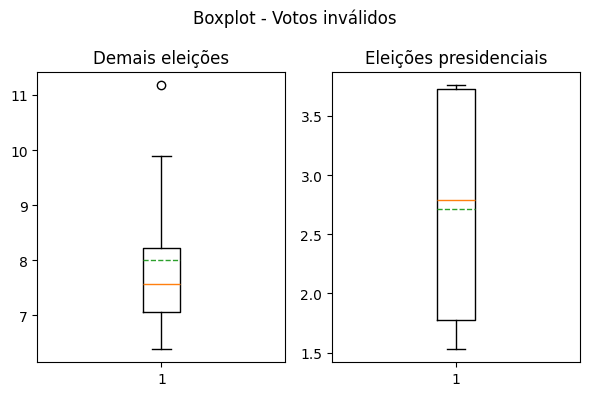

In [8]:
lista_dataframes = [df_votos_1, df_votos_2]
titulo_boxplot = 'Boxplot - Votos inválidos'
subtitulo_boxplot = ['Demais eleições', 'Eleições presidenciais']

fig, axs = plt.subplots(1, 2, figsize=(6, 4))

# Loop para criar e exibir os boxplots
for i, df in enumerate(lista_dataframes):
    axs[i].boxplot(lista_dataframes[i]['%'],  
                   showmeans=True, 
                   meanline=True)
    axs[i].set_title(subtitulo_boxplot[i])
    

# Ajuste o título da figura
fig.suptitle(titulo_boxplot)

# Ajuste o layout da figura
plt.tight_layout()

# Exiba a figura
plt.show()

## E o que temos?

* **Na eleição presidencial:**
    - Os valores estão com uma leve tendência a esquerda (para valores menores que a média), mas não é algo claramente discrepante.
    - Quanto aos quartis, podemos notar uma leve assimetria. Há mais valores no primeiro quartil do que no terceiro quartil.
    - Em termos práticos, podemos ver que os números de votos inválidos para presidente foram bem equilibrados, não apresentando diferenças significantes.
    - A média e a mediana tiveram quase o mesmo valor, o que evidencia a baixa assimetria dos dados.


* **Nas demais eieções:**
    - Aqui o quadro é diferente: Existe um enviesamento considerável dos dados à direita, tanto que a mediana é menor do que a média calculada.
    - Isso significa que há valores grandes, além do terceiro quartil, puxando o estimador pra cima; portanto, **podem haver outliers acima do valor máximo.**
    - E de fato, temos outliers. Apenas um outlier, o que pode indicar que houve um evento atípico na votação pra algum cargo. 
    - Se temos esse tipo de informação preliminar nesse boxplot, significa que a porcentagem de votos inválidos teve uma cara bastante diversificada, inclusive com pontos fora da curva (o outlier acima).
    - Ainda falando em termos práticos, a assimetria a direita indica que houve uma quantidade considerável de votos nulos e brancos em cada categoria do segundo tipo.
    
Em geral, o perfil dos votos inválidos foi bem diferenciado. A eleição presidencial foi a que mais manteve um perfil "estável", com poucos votos em ambos os turnos; Não podemos dizer o mesmo das eleições para os demais cargos, a diversificação aparentemente foi alta e com grandes quantidades de nulos e brancos. Abaixo, seguem os gráficos de cada cargo para que possamos entender a distribuição desses votos nulos e brancos por cargo.

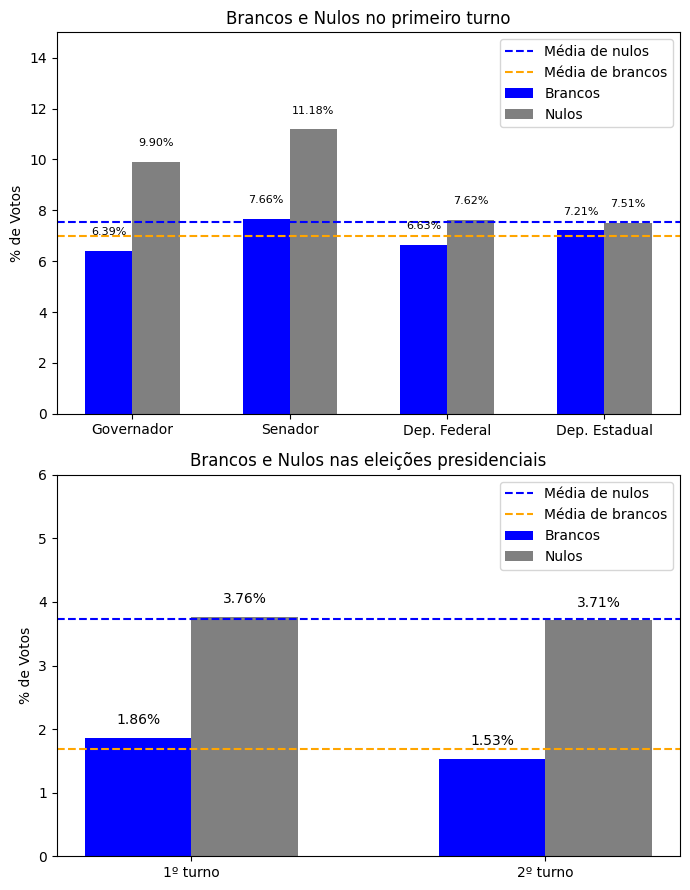

In [9]:
fig, axes = plt.subplots(2, 1, figsize=(7,9))

posicoes_1 = range(len(df_95))
axes[0].bar(posicoes_1, df_95['%'], width=largura, color='blue', label="Brancos")
axes[0].bar([pos + largura for pos in posicoes_1], df_96['%'], width=largura, color='grey', label='Nulos')
axes[0].axhline(media_nulos, color='blue', linestyle='--', label=f'Média de nulos')
axes[0].axhline(media_brancos, color='orange', linestyle='--', label=f'Média de brancos')
axes[0].set_xticks([pos + largura / 2 for pos in posicoes_1])
axes[0].set_xticklabels(df_95['NOME_CARGO'])
axes[0].set_ylabel('% de Votos')
axes[0].set_ylim(0, 15)
axes[0].set_title('Brancos e Nulos no primeiro turno')

for pos, valor in zip(posicoes_1, df_95['%']):
    axes[0].annotate(f'{valor:.2f}%',
                     (pos, valor),
                     textcoords="offset points",
                     xytext=(0, 10),
                     ha='center',
                     va='bottom',
                     fontsize=8)

for pos, valor in zip([pos + largura for pos in posicoes_1], df_96['%']):
    axes[0].annotate(f'{valor:.2f}%',
                     (pos, valor),
                     textcoords="offset points",
                     xytext=(0, 10),
                     ha='center',
                     va='bottom',
                     fontsize=8)

posicoes_2 = range(len(df_95_2))
axes[1].bar(posicoes_2, df_95_2['%'], width=0.3, color='blue', label="Brancos")
axes[1].bar([pos + largura for pos in posicoes_2], df_96_2['%'], width=0.3, color='grey', label='Nulos')
axes[1].axhline(media_nulos_2, color='blue', linestyle='--', label=f'Média de nulos')
axes[1].axhline(media_brancos_2, color='orange', linestyle='--', label=f'Média de brancos')
axes[1].set_xticks([pos + largura / 2 for pos in posicoes_2])
axes[1].set_xticklabels(['1º turno', '2º turno'])
axes[1].set_ylabel('% de Votos')
axes[1].set_ylim(0, 6)
axes[1].set_title('Brancos e Nulos nas eleições presidenciais')

for pos, valor in zip(posicoes_2, df_95_2['%']):
    axes[1].annotate(f'{valor:.2f}%',
                     (pos, valor),
                     textcoords="offset points",
                     xytext=(0, 10),
                     ha='center',
                     fontsize=10)

for pos, valor in zip([pos + largura for pos in posicoes_2], df_96_2['%']):
    axes[1].annotate(f'{valor:.2f}%',
                     (pos, valor),
                     textcoords="offset points",
                     xytext=(0, 10),
                     ha='center',
                     fontsize=10)

for ax in axes:
    ax.legend(loc='upper right')
    
lista_dataframes = [df_votos_1, df_votos_2]
titulo_boxplot = ['% de votos - primeiro turno', '% de votos - segundo turno']

# Ajuste o layout da figura
plt.tight_layout()

plt.tight_layout()
plt.show()

## O que podemos concluir dessa parte?

Temos um considerável número de conclusões
 
* A soma de brancos e nulos **chegou perto dos 20%** em alguns cargos - **isso sem analisar os votos anulados judicialmente.**
* A diferença percentual entre nulos e brancos, para cada cargo, **chegou a 40%** - votos nulos sempre acima dos brancos, **em todos os cargos.**


* **A média do primeiro turno:**
    - **5.38%** de votos brancos.
    - **7.56%** de votos nulos. A média foi reajustada devido a distorção que os votos nulos para senador causava.
* **Já a do segundo turno:**
    - **1,7%** de votos brancos.
    - **3.7%** de votos nulos.


* **Avaliando categoria a categoria, podemos concluir que:**
    - **A eleição presidencial obteve os menores números de nulos e brancos nos dois turnos.** A medida que os turnos passaram, os votos em branco caíram quase 18%. 
    - **Deputados estaduais e federais tiveram uma baixa variação entre os seus números de nulos e brancos**, ainda que os votos em branco para deputados estaduais tenham sido um pouco acima da média.
    - **Senadores e governadores tiveram votações atípicas de modo geral.** Tanto que o boxplot não engana, a assimetria a direita é mostrada no percentual dos dois cargos. Com exceção dos **votos brancos para governador**, todas as medidas passaram da média (e com certeza ultrapassaram a mediana), sendo que os votos nulos para os dois cargos foram responsáveis por jogar os números para cima no boxplot.


* **O que inferir a partir desses números:**
    - **A votação para presidente, em Nova Friburgo, foi a que menos teve desinteresses ou erros**, tanto que as eleições foram apertadas no segundo turno Brasil afora (a diferença de votos entre os dois candidatos ficou abaixo dos 2% nacionalmente). O percentual obtido realça um pensamento senso-comum, de que o presidente é a parte mais importante das eleições (por ser chefe do Executivo). Pensamento errado? Sim.
    - **Muitas abstenções foram registradas nas eleições para governador - o maior percentual dos votos em branco**; Isso pode ser inferido pelos recentes escândalos que resultaram no impeachment do ex-governador Wilson Witzel (ele será citado novamente nesta análise).
    - **Quanto ao cargo de senador, a quantidade de votos nulos assusta**. Houveram incidentes antes das eleições que culminaram com a cassação do mandato do (agora) ex-senador Daniel Silveira (PTB). Depois analisaremos mais profundamente a quantidade de votos anulados sub judice e votos normais.
    - **Quanto a deputados federais e estaduais, o percentual permaneceu basicamente o mesmo**. Ainda são números expressivos, não há dúvidas.

# E quanto aos bairros que mais votaram nulo ou votaram branco?

Do mesmo modo que analisamos os números totais da eleições, em termos de frequência e classificação, precisamos fazer o mesmo com os votos nulos e brancos. Estratégias partidárias focadas em converter esses votos para votos válidos podem partir daqui. Aqui iremos observar a quantidade de votos nulos e brancos com relação a quantidade de votos totais do bairro em questão. 


Podemos medir pelos números absolutos, mas isso não seria algo correto. Se, por exemplo, Olaria tem uma quantidade maior de votantes do que Salinas, a quantidade de votos brancos e nulos pode também ser maior mas pode ser que, proporcionalmente, Salinas tenha pessoas mais isentas que Olaria. É interessante analisar a distribuição dessas porcentagens, já que podemos entender se houveram comportamentos anormais.

Irei fazer **três boxplots e dois gráficos**
* Boxplots:
    - Distribuição dos votos brancos
    - Distribuição dos votos nulos
    - Distribuição da porcentagem relativa ao total de eleitores do bairro
* Gráficos:
    - Bairros que mais tiveram % de votos brancos e nulos
    - Bairros que menos tiveram % de votos brancos e nulos

In [10]:
%%time

cond = ((df_1['NUMERO'] == 95) | (df_1['NUMERO'] == 96)) & (df_1['TURNO'] == 1)
df_bairros_2 = df_1[cond]

df_bairros_2 = df_bairros_2.groupby(['BAIRRO', 'NUMERO'])['VOTOS'].sum().to_frame().reset_index()

df_bairros_2 = df_bairros_2.pivot_table(index='BAIRRO', 
                                        columns='NUMERO', 
                                        values='VOTOS', 
                                        aggfunc='sum', 
                                        fill_value=0).reset_index()

df_bairros_2['%'] = (((df_bairros_2[95] + df_bairros_2[96]) / df_bairro['VOTOS']) * 100).round(2)
df_bairros_2.columns = ['BAIRRO', 'BRANCOS', 'NULOS', '%']
df_bairros_2.sort_values(by='%', inplace=True, ascending=False)
df_bairros_2_topo = df_bairros_2.head(10)
df_bairros_2_fundo = df_bairros_2.tail(10)


CPU times: total: 15.6 ms
Wall time: 15 ms


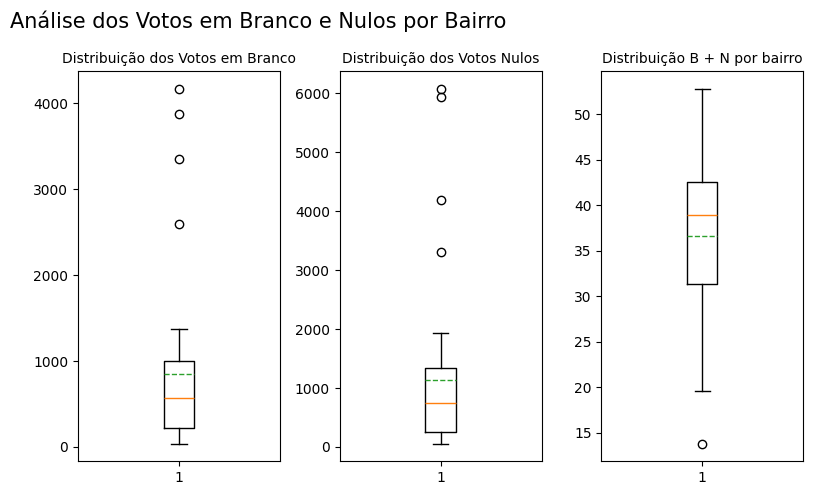

In [11]:
fig, (box1, box2, box3) = plt.subplots(1,3,figsize=(8,5))
plt.subplots_adjust(hspace=0.5)

# Boxplot para os votos em branco
box1.boxplot(df_bairros_2['BRANCOS'], showmeans=True, meanline=True)
box1.set_title('Distribuição dos Votos em Branco', fontsize=10)

# Boxplot para os votos nulos
box2.boxplot(df_bairros_2['NULOS'], showmeans=True, meanline=True)
box2.set_title('Distribuição dos Votos Nulos', fontsize=10)

# Boxplot para os votos nulos
box3.boxplot(df_bairros_2['%'], showmeans=True, meanline=True)
box3.set_title('Distribuição B + N por bairro', fontsize=10)

for box in (box1,box2,box3):
    box.xaxis.grid(False)
    box.yaxis.grid(False)

plt.suptitle('Análise dos Votos em Branco e Nulos por Bairro', x=0.3, fontsize=15) 
plt.tight_layout()
plt.show()

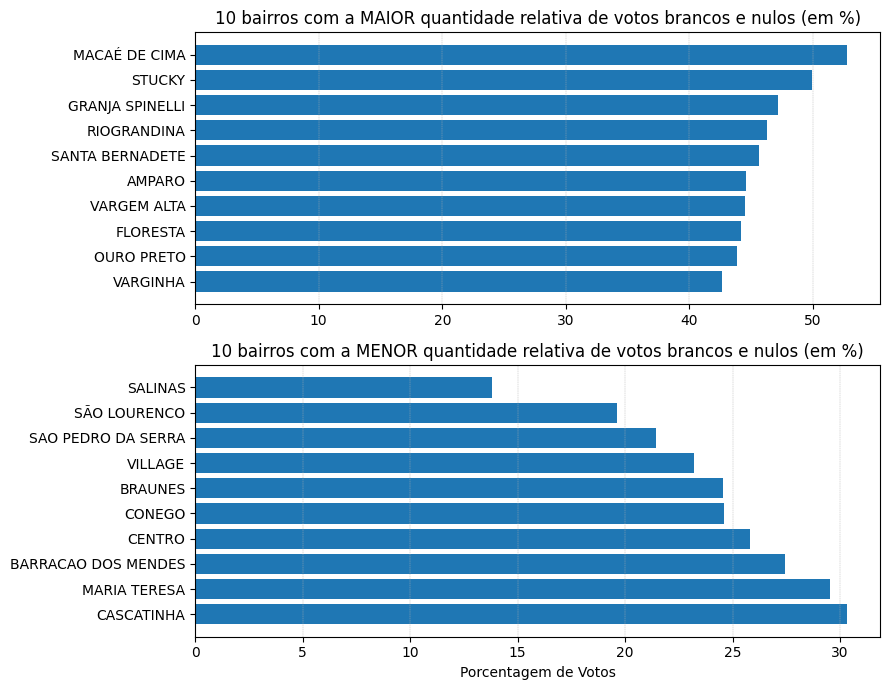

In [12]:
fig, (ax1, ax2) = plt.subplots(2,1,figsize=(9,7))

ax1.barh(df_bairros_2_topo['BAIRRO'], df_bairros_2_topo['%'])
ax1.set_title('10 bairros com a MAIOR quantidade relativa de votos brancos e nulos (em %)')
ax1.invert_yaxis()
ax1.yaxis.grid(False)
ax1.xaxis.grid(True, linestyle='--', linewidth=0.3, alpha=1)

ax2.barh(df_bairros_2_fundo['BAIRRO'], df_bairros_2_fundo['%'])
ax2.set_xlabel('Porcentagem de Votos')
ax2.set_title('10 bairros com a MENOR quantidade relativa de votos brancos e nulos (em %)')
ax2.yaxis.grid(False)
ax2.xaxis.grid(True, linestyle='--', linewidth=0.3, alpha=1)

plt.tight_layout()
plt.show()

## E aí?

Há algumas informações interessantes, que podem ser determinadas futuramente com um teste de hipóteses:
* Alguns bairros que estavam na listagem de menor quantidade de votantes apresentaram uma quantidade alta de isenções/erros, como:
    - Macaé de Cima, que **ultrapassou os 50% de isenções**
    - Granja Spinelli
    - Stucky, que veio em segundo lugar, **com quase 50% de isenções**
    - São Lourenço
* Por outro lado, alguns dos menos isentos também estavam na listagem citada acima:
    - São Lourenço
    - Cônego
* No geral, os bairros mais isentos **passaram dos 40% de votos do tipo.**
* Enquanto que quase todos os bairros com maior engajamento **não chegaram nem a 30% de isenções.**
* Se formos olhar o boxplot da distribuição dos votos nulos, brancos e da porcentagem relativa a cada bairro, podemos perceber que **houve uma normalização quando passamos a considerar a soma dos nulos e brancos relativa a quantidade total de votos**. É uma forma muito melhor e bem mais precisa de entendermos a distribuição desses votos cidade afora - que **só teve um outlier a esquerda: Salinas. Ou seja: Não houveram muitos casos anormais de engajamento, nem pra mais e nem para menos.** Analisar apenas em termos absolutos traria muitos erros na hora de inferir informações sobre esse tipo de voto cidade afora.
* **Podemos atribuir o fato de alguns bairros apresentarem altos números de isenção serem predominantemente rurais? Não.** Salinas possuiu o menor percentual relativo de todos, enquanto que um bairro igualmente rural (Macaé de Cima) liderou o ranking dos mais isentos. **Isso teria que ser estimado tendo informações mais precisas.**

# E os votos anulados 'sub judice'?

Pertencente aos votos nulos mas não contabilizada "in-situ" pela urna - sendo posteriormente processada, consiste nos votos para candidaturas anuladas porém com recurso correndo na justiça eleitoral. Como as urnas não são atualizadas em tempo real, os números de todas as candidaturas são inseridos em todas elas previamente, e em muitos casos os recursos contra indeferimento só são julgados **após** as eleições.

Uma candidatura pode ser indeferida por muitos motivos, não vou me aprofundar em todos eles - [aqui se encontra um artigo ótimo para melhor entendimento](https://www.tre-pr.jus.br/comunicacao/noticias/2020/Novembro/saiba-como-fica-a-situacao-dos-candidatos-eleitos-sub-judice). O que importa é que esses votos foram computados como se fossem normais e no dataset não há nada indicando se um voto pode ser anulado sub judice. 

Fiz um pré processamento desses dados, [utilizando outra planilha obtida no site do TSE como base ](https://sig.tse.jus.br/ords/dwapr/r/seai/sig-eleicao-comp-abst/home?session=214685061254358) e, a partir disso, mesclei os dados com o dataset principal. Isso me permitiu obter mais uma dimensão para os meus dados: _Votos válidos ou inválidos?_

No Estado do Rio de Janeiro, em específico, houveram alguns casos famosos de anulação de candidatura. Dois deles envolvem o ex Governador do Estado, Wilson Witzel, e o ex senador Daniel Silveira. Não vou entrar em detalhes, deixarei links para notícias envolvendo o caso completo. O importante é saber que naturalmente acontecem essas coisas, mas há situações que se sobressaem completamente.

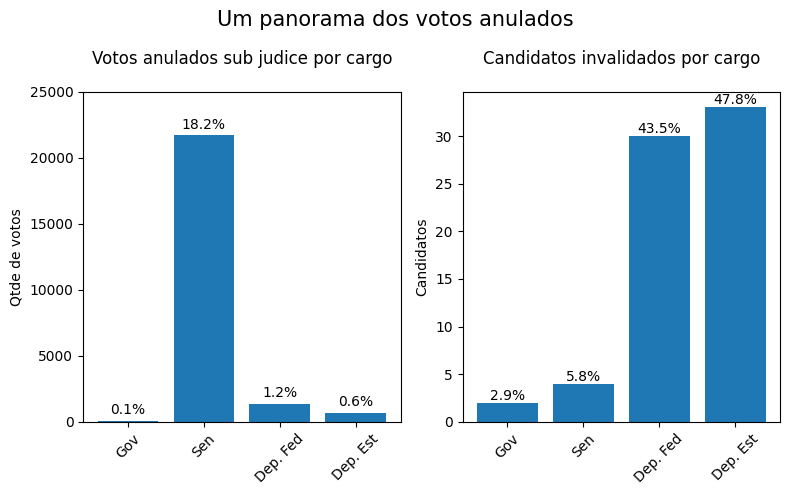

In [13]:
cond = (
    (df_1['SITUACAO'] == 0) 
    & (df_1['NUMERO'] != 95) 
    & (df_1['NUMERO'] != 96)
    & (df_1['TURNO'] == 1) 
    & (df_1['CARGO'] != 1)
)

df_anulados = df_1[cond]

df_anulados_geral = df_anulados.groupby('CARGO')['VOTOS'].sum().to_frame().reset_index()
df_anulados_geral['%'] = ((df_anulados_geral['VOTOS'] / VOTOS_POR_TURNO_1) * 100).round(1)
pos = range(len(df_anulados_geral))

df_freq = df_anulados.drop_duplicates(subset='NUMERO')
df_freq = df_freq.groupby('CARGO').count()['NUMERO'].reset_index()
df_freq['%'] = ((df_freq['NUMERO'] / df_freq['NUMERO'].sum()) * 100).round(1)
pos = range(len(df_freq))

rotulos = ['Gov', 'Sen', 'Dep. Fed', 'Dep. Est']

# USAR TREEMAP PRAS DUAS PARADAS

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(8,5))
ax1.bar(pos, df_anulados_geral['VOTOS'])
ax1.set_ylabel('Qtde de votos')
ax1.set_title('Votos anulados sub judice por cargo', pad=20)
ax1.set_ylim(0, 25000)
ax1.set_xticks(pos, rotulos, rotation=45)
ax1.xaxis.grid(False)

for p, v in zip(pos, df_anulados_geral['%']):
    ax1.text(p, df_anulados_geral['VOTOS'][p] + 500, str(v) + '%', ha='center')

ax2.bar(pos, df_freq['NUMERO'])
ax2.set_ylabel('Candidatos')
ax2.set_title('Candidatos invalidados por cargo', pad=20)
ax2.set_xticks(pos, rotulos, rotation=45)
ax2.xaxis.grid(False)

for p, v in zip(pos, df_freq['%']):
    ax2.text(p, df_freq['NUMERO'][p], str(v) + '%', va='bottom', ha='center')


plt.suptitle('Um panorama dos votos anulados', x=0.5, fontsize=15) 
plt.tight_layout()
plt.show()

### E aí?

A contagem de votos invalidados é assustadora para senador. Se ignorarmos esse leviatã, a liderança da invalidez é dos deputados federais (1391 votos), seguidos dos deputados estaduais (681 votos, praticamente metade) e, por fim, governadores (102 votos, quase nada). Somando essa porcentagem aos valores obtidos nos gráficos anteriores para brancos e nulos, a média de votos nulos saltaria para quase 30% de todos os votos. Definitivamente um senhor outlier.

Iremos ver a distribuição desses votos inválidos para senador e outros cargos, para entender como foi o perfil dos invalidados em cada cargo.

Como mostrado pelos gráficos, há uma situação atípica: Menos de 5 candidaturas ao senado foram registradas como inválidas, mas elas dominam **quase 19% dos votos totais DENTRO da sua categoria**, enquanto os candidatos a deputado (estadual e federal) possuem 30 ou mais candidaturas indeferidas mas representam nem 2% dos votos somados - o que não chega a ser relevante. Para governador, houveram 2 candidaturas indeferidas, mas o percentual é de 0.09% - outro caso irrelevante. Iremos analisar o que houve e como foi a distribuição dos votos para senador.

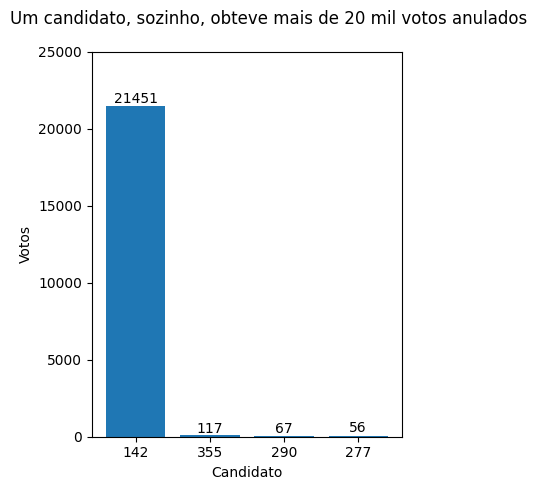

In [14]:
cond = (df_anulados['CARGO'] == 5)
df_sen = df_anulados[cond]

df_sen = df_sen.groupby('NUMERO')['VOTOS'].sum().to_frame().reset_index().sort_values(by='VOTOS', ascending=False)
pos = range(len(df_sen))

plt.figure(figsize=(4, 5))
pos = range(len(df_sen['NUMERO']))
plt.bar(pos, df_sen['VOTOS'])
plt.xticks(pos, df_sen['NUMERO'])
plt.xlabel('Candidato')
plt.ylabel('Votos')
plt.ylim(0, 25000)
plt.title('Um candidato, sozinho, obteve mais de 20 mil votos anulados', pad=20, fontsize=12, x=0.57)
plt.gca().xaxis.grid(False)

for p, v in zip(pos,df_sen['VOTOS']):
    plt.text(p, df_sen['VOTOS'][p], str(v), va='bottom', ha='center')


plt.show()

# Como isso aconteceu?

Verificando o histórico das eleições, podemos conferir que o montante gigante de votos acima foi para o candidato Daniel Silveira (PTB). [Aqui toda a história é explicada](https://oglobo.globo.com/politica/eleicoes-2022/noticia/2022/10/inelegivel-daniel-silveira-recebe-15-milhao-de-votos-para-o-senado-no-rio.ghtml), mas em resumo: Ele foi condenado por um crime, foi considerado inelegível pelos critérios do TSE mas recorreu; nesse meio tempo, ele pode fazer a sua campanha. No final das contas, todos os votos para ele foram anulados.

Esse tipo de ocorrido nos passa uma impressão: Este tipo de acontecimento abala a confiança nas eleições, já que há a possibilidade de votar em um candidato que tenha recorrido da decisão do TSE porém a candidatura do mesmo ser indeferida **APÓS** as eleições. Tiveram outros eventos parecidos em alguns outros estados, o que evidencia mais ainda esse ponto da insegurança eleitoral.

# Sobre partidos, candidatos e alinhamentos

Agora vem a parte onde analisamos os componentes da coisa.

Sabemos como os números de votos válidos, inválidos e isentos se comportam entre si, agora queremos saber como as coisas estão com relação a partidos, alinhamentos e candidatos.

## 1. Relação de votos por alinhamento político

Vamos começar pelos votos por alinhamento político. Importante para entender a preferência do friburguense com relação ao alinhamento ideológico dos partidos. Por se tratar de uma análise mais simples, optei por reduzir as nuances do espectro político - posicionamentos como *'EXTREMA-x'*, *'CENTRO-x'* e *CENTRO* não serão considerados -, apenas *DIREITA* e *ESQUERDA* estarão aqui. Irei contabilizar TODOS os votos, em TODOS os cargos - mas apenas no primeiro turno, onde a variedade de partidos é mais alta. Quanto a cargos que possuíram votos tanto no primeiro turno quanto no segundo (apenas presidente), irei considerar a média de votos nos turnos, para termos uma aproximação melhor.

A estrutura de análise continua a mesma: Primeiramente, um boxplot para entendermos a distribuição dos votos, posteriormente um gráfico mostrando a diferença entre cada espectro na votação.

In [15]:
%%time
cond = (df_1['ALINHAMENTO'] != 'IRRELEVANTE') & (df_1['TURNO'] == 1)

df_espectro = df_1[cond]
df_espectro = df_espectro.groupby('ALINHAMENTO')['VOTOS'].sum().reset_index().sort_values(by='VOTOS', ascending=False)
df_espectro['%'] = ((df_espectro['VOTOS'] / df_espectro['VOTOS'].sum()) * 100).round(1)

CPU times: total: 31.2 ms
Wall time: 24.9 ms


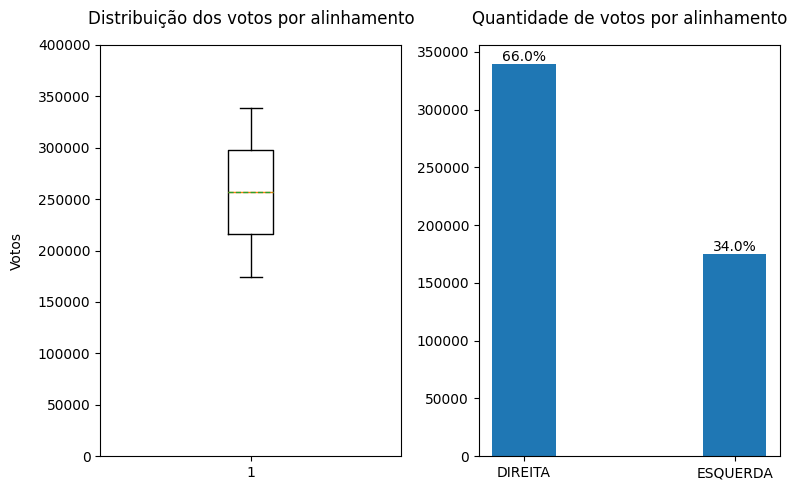

In [16]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 5))

ax1.boxplot(df_espectro['VOTOS'], showmeans=True, meanline=True)
ax1.set_ylabel('Votos', labelpad=10)
ax1.set_title('Distribuição dos votos por alinhamento', fontsize=12, pad=15)
ax1.set_ylim(0, 400000)
ax1.xaxis.grid(False)

bars = ax2.bar(df_espectro['ALINHAMENTO'], df_espectro['VOTOS'], width=0.3)
ax2.set_title('Quantidade de votos por alinhamento', fontsize=12, pad=15)
for bar, percent in zip(bars, df_espectro['%']):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width() / 2, height + 500, f'{percent:.1f}%', ha='center', va='bottom')
ax2.xaxis.grid(False)


plt.tight_layout()
plt.show()

## 2. E como ficou a distribuição dos votos para os bairros com relação ao alinhamento ideológico dos partidos?

<timed exec>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



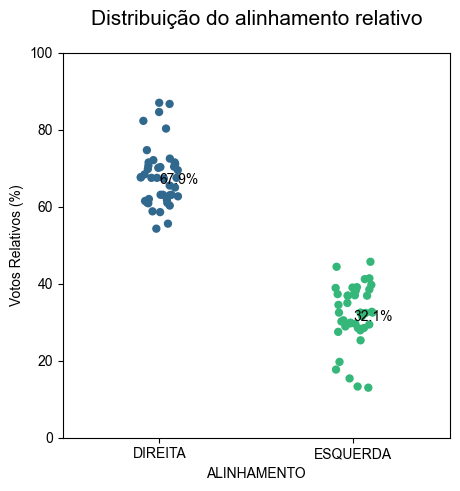

CPU times: total: 188 ms
Wall time: 178 ms


In [17]:
%%time
cond = (df_1['ALINHAMENTO'] != 'IRRELEVANTE') & (df_1['TURNO'] == 1)

df_bairro2 = df_1[cond]
df_bairro2 = df_bairro2.groupby(['BAIRRO', 'ALINHAMENTO'])['VOTOS'].sum().reset_index()
df_bairro2['%_REL'] = (df_bairro2['VOTOS'] / df_bairro2.groupby('BAIRRO')['VOTOS'].transform('sum') * 100).round(1)
df_melted = pd.melt(df_bairro2, id_vars=['BAIRRO', 'ALINHAMENTO'], value_vars='%_REL')

plt.figure(figsize=(5, 5))
sns.stripplot(x="ALINHAMENTO", y="value", data=df_melted, jitter=True, palette="viridis", size=6)
medias = df_melted.groupby('ALINHAMENTO')['value'].mean().round(1)
for i, label in enumerate(medias.index):
    plt.text(i, medias[label] + 1, f'{medias[label]}%', ha='left', va='top', color='black')
plt.title("Distribuição do alinhamento relativo", fontsize=15, pad=20)
plt.ylabel("Votos Relativos (%)")
plt.xticks()
plt.ylim(0,100)

sns.set_style("whitegrid", {'axes.grid.axis': 'y'})
plt.show()

## 3. Agora, quais bairros votaram mais e menos para partidos de esquerda? E para partidos de direita?

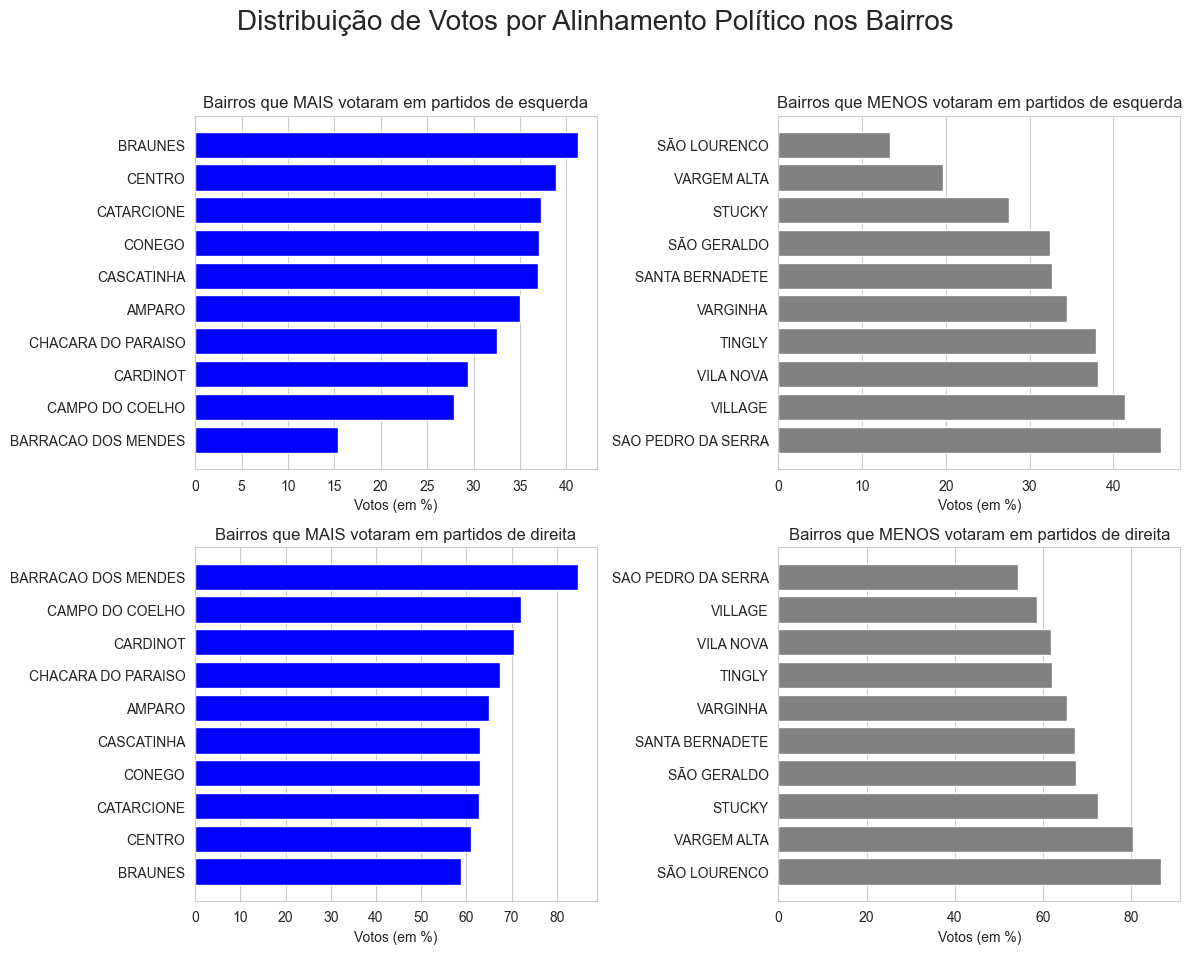

CPU times: total: 1.58 s
Wall time: 1.6 s


In [18]:
%%time
cond = ((df_1['ALINHAMENTO'] != 'IRRELEVANTE') & (df_1['TURNO'] == 1))
df_partidos = df_1[cond]

lista_partidos = df_partidos[['SIGLA', 'ALINHAMENTO']].drop_duplicates()
df_partidos_1 = df_partidos.groupby('SIGLA')['VOTOS'].sum().reset_index().sort_values(by='VOTOS', ascending=False)
df_partidos_1 = df_partidos_1.merge(lista_partidos[['SIGLA', 'ALINHAMENTO']], on='SIGLA', how='left')

topo = df_partidos_1.head(10)
fundo = df_partidos_1.tail(10)

df_partidos_2 = pd.pivot_table(df_partidos,
                               values='VOTOS',
                               index='BAIRRO',
                               columns='ALINHAMENTO',
                               aggfunc='sum',
                               fill_value=0).reset_index()

df_auxiliar = df_bairro2.groupby('BAIRRO')['VOTOS'].sum().to_frame().reset_index()
df_partidos_2 = df_partidos_2.merge(df_auxiliar, on='BAIRRO', how='left')

df_partidos_2['DIR'] = (df_partidos_2['DIREITA'] / df_partidos_2['VOTOS'] * 100).round(1)
df_partidos_2['ESQ'] = (df_partidos_2['ESQUERDA'] / df_partidos_2['VOTOS'] * 100).round(1)

colunas = ['VOTOS','DIREITA', 'ESQUERDA']
legenda_alinhamento = ['esquerda', 'direita']
df_partidos_2.drop(columns=colunas, inplace=True)

tupla = ()
fig, tupla = plt.subplots(2, 2, figsize=(12, 10))

alinhamentos = ['ESQ','DIR']
for i, alinhamento in enumerate(alinhamentos):
    ax1, ax2 = tupla[i]

    maximo = df_partidos_2.head(10).sort_values(alinhamento, ascending=True)
    minimo = df_partidos_2.tail(10).sort_values(alinhamento, ascending=False)

    ax1.barh(maximo['BAIRRO'], maximo[alinhamento], color='blue')
    ax2.barh(minimo['BAIRRO'], minimo[alinhamento], color='gray')
    
    ax1.set_title(f'Bairros que MAIS votaram em partidos de {legenda_alinhamento[i]}')
    ax2.set_title(f'Bairros que MENOS votaram em partidos de {legenda_alinhamento[i]}')
    ax1.yaxis.grid(False)
    ax2.yaxis.grid(False)
    ax1.set_xlabel('Votos (em %)')
    ax2.set_xlabel('Votos (em %)')

plt.suptitle('Distribuição de Votos por Alinhamento Político nos Bairros', fontsize=20)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  

plt.savefig('plot.png')
plt.show()

## 4. Quais foram os partidos mais e os menos votados?

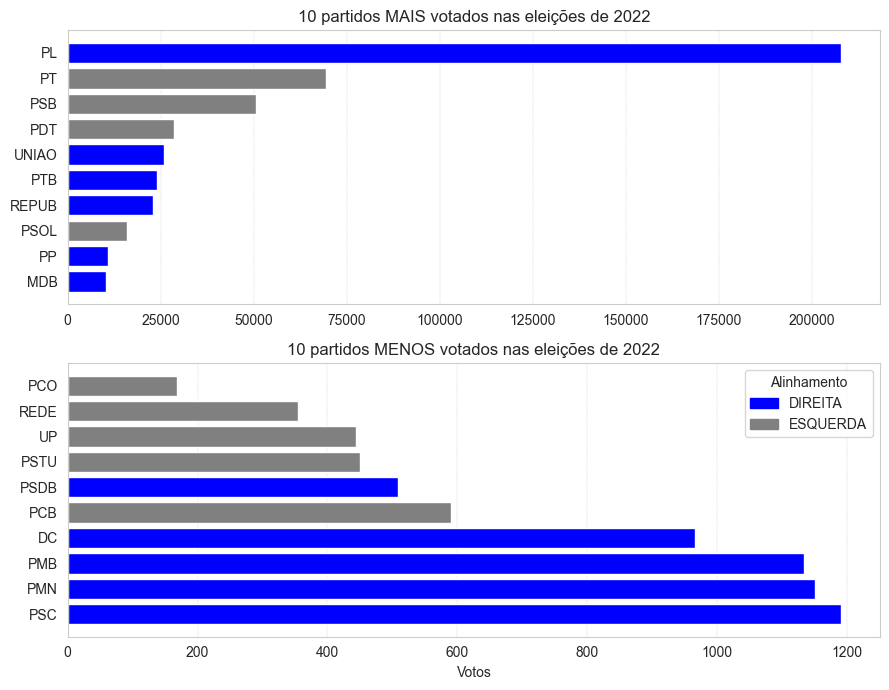

In [19]:
mapeamento_cores = {'DIREITA': 'blue', 'ESQUERDA': 'gray'}

cores_topo = [mapeamento_cores.get(alinhamento, 'green') for alinhamento in topo['ALINHAMENTO']]
cores_fundo = [mapeamento_cores.get(alinhamento, 'green') for alinhamento in fundo['ALINHAMENTO']]

legendas = ['DIREITA' if alinhamento == 'DIREITA' 
            else 'ESQUERDA' 
            for alinhamento in df_partidos_1['ALINHAMENTO']]

legenda = [Patch(color='blue', label='DIREITA'), 
                 Patch(color='gray', label='ESQUERDA')]

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(9, 7))

ax1.barh(topo['SIGLA'], topo['VOTOS'], color=cores_topo)
ax1.set_title('10 partidos MAIS votados nas eleições de 2022')
ax1.invert_yaxis()
ax1.yaxis.grid(False)
ax1.xaxis.grid(True, linestyle='--', linewidth=0.3, alpha=1)

ax2.barh(fundo['SIGLA'], fundo['VOTOS'], color=cores_fundo)
ax2.set_xlabel('Votos')
ax2.set_title('10 partidos MENOS votados nas eleições de 2022')
ax2.yaxis.grid(False)
ax2.xaxis.grid(True, linestyle='--', linewidth=0.3, alpha=1)

ax2.legend(handles=legenda, title='Alinhamento')

plt.tight_layout()
plt.show()

## 5. Quais foram os partidos mais votados por cargo?

<timed exec>:13: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[64244.5 44278.5]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.


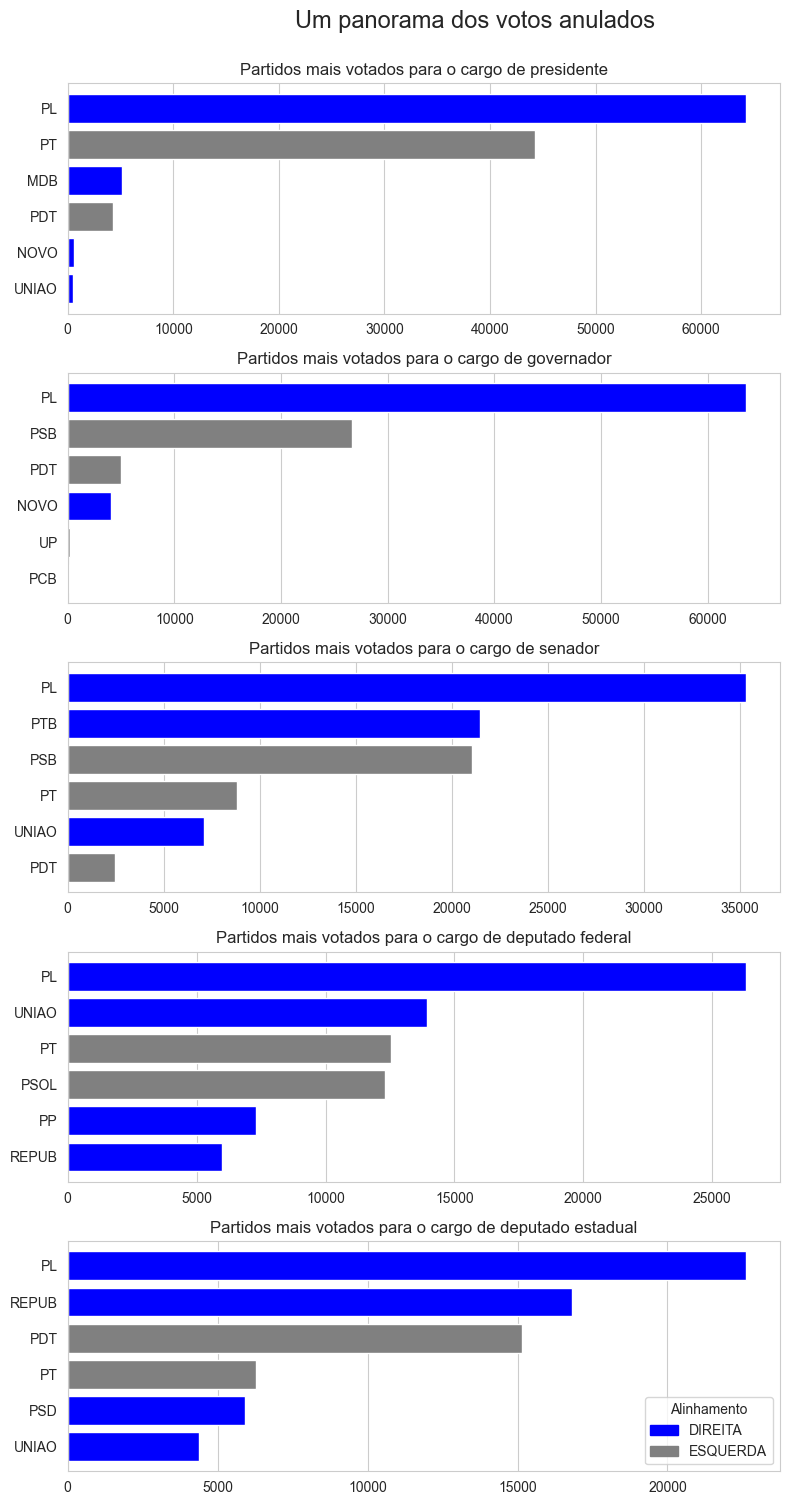

CPU times: total: 1.05 s
Wall time: 1.06 s


In [20]:
%%time
cond = (df_1['ALINHAMENTO'] != 'IRRELEVANTE')
df_cargos = df_1[cond]

df_partidos_3 = pd.pivot_table(df_cargos,
                               values='VOTOS',
                               index='SIGLA',
                               columns='CARGO',
                               aggfunc='sum',
                               fill_value=0).reset_index()

df_partidos_3.columns = ['SIGLA','PR', 'GOV', 'SEN', 'DF', 'DE']
exclusivos = df_partidos_3['SIGLA'].isin(['PT', 'PL'])
df_partidos_3.loc[exclusivos, 'PR'] /= 2
df_alinhamento = df_partidos_1[['SIGLA', 'ALINHAMENTO']]

df_partidos_3 = df_partidos_3.merge(df_alinhamento, on='SIGLA', how='left')
df_partidos_3['ALINHAMENTO'] = df_partidos_3['ALINHAMENTO']


fig, tupla = plt.subplots(5, 1, figsize=(8, 15))

legenda_alinhamento = ['presidente', 'governador', 'senador', 'deputado federal', 'deputado estadual']
cargos = ['PR', 'GOV', 'SEN', 'DF', 'DE']

for i, cargo in enumerate(cargos):
    ax = tupla[i]
    
    topo = df_partidos_3.sort_values(by=cargo, ascending=False).head(6)
    cores = ['blue' if c == 'DIREITA' else 'grey' for c in topo['ALINHAMENTO']]
    
    ax.barh(topo['SIGLA'], topo[cargo], color=cores)
    ax.invert_yaxis()
    
    ax.set_title(f'Partidos mais votados para o cargo de {legenda_alinhamento[i]}')
    ax.yaxis.grid(False)

    
legenda = [Patch(color='blue', label='DIREITA'), Patch(color='grey', label='ESQUERDA')]
plt.suptitle('Um panorama dos votos anulados', x=0.6, y=1, fontsize=17) 

plt.tight_layout()  
plt.legend(handles=legenda, title='Alinhamento')
plt.show()

## Conclusões:

- O Partido Liberal (PL) lidera a votação por cargos em praticamente todos os segmentos, com folgas expressivas em cima de outros partidos
- Os partidos de direita ocupam o primeiro e segundo lugar no ranking de boa parte dos cargos, em alguns casos angariando o dobro de votos, juntos, que o terceiro colocado (algum partido de esquerda)
- Ainda falando sobre os partidos de esquerda: Podemos ver que, mesmo tendo ganho as eleições, o PT não foi a primeira escolha de boa parte dos eleitores friburguenses. O PDT e o PSB pegaram mais votos.

## 6. Partidos mais votados por alinhamento

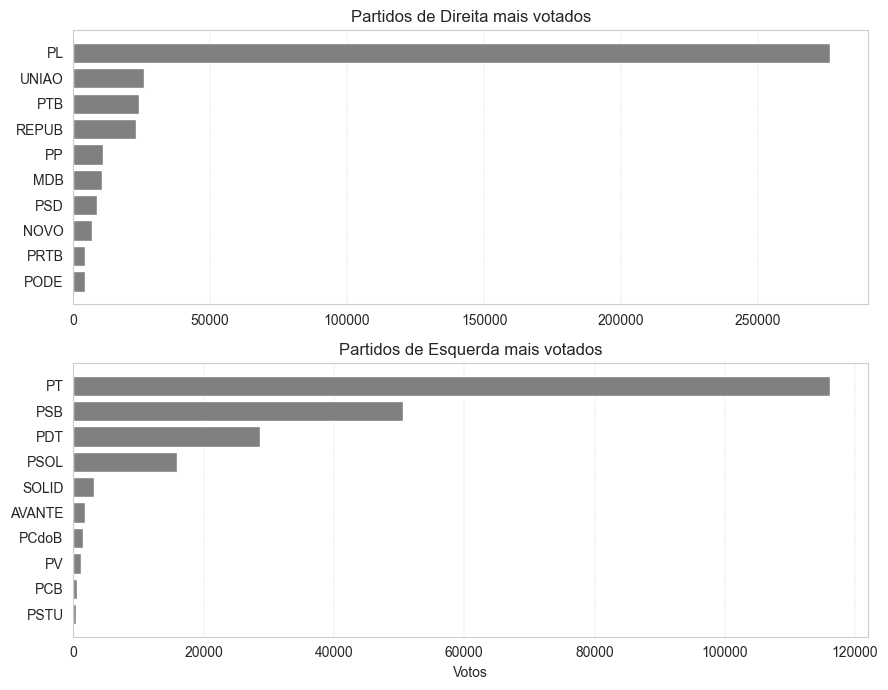

In [21]:
df_alinhamento = df_cargos[["VOTOS", "ALINHAMENTO", "SIGLA"]]
agrupados = df_alinhamento.groupby(["SIGLA", "ALINHAMENTO"])["VOTOS"].sum().to_frame().reset_index()
agrupados.rename(columns={"VOTOS" : "TOTAL"})

agrupados_ESQ = agrupados.query("ALINHAMENTO == 'ESQUERDA'").sort_values(by="VOTOS", ascending=False).head(10)
agrupados_DIR = agrupados.query("ALINHAMENTO == 'DIREITA'").sort_values(by="VOTOS", ascending=False).head(10)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(9, 7))

ax1.barh(agrupados_DIR['SIGLA'], agrupados_DIR['VOTOS'], color="gray")
ax1.set_title('Partidos de Direita mais votados')
ax1.invert_yaxis()
ax1.yaxis.grid(False)
ax1.xaxis.grid(True, linestyle='--', linewidth=0.3, alpha=1)

ax2.barh(agrupados_ESQ['SIGLA'], agrupados_ESQ['VOTOS'], color="gray")
ax2.set_xlabel('Votos')
ax2.set_title('Partidos de Esquerda mais votados')
ax2.invert_yaxis()
ax2.yaxis.grid(False)
ax2.xaxis.grid(True, linestyle='--', linewidth=0.3, alpha=1)

plt.tight_layout()
plt.show()

## 7. Votos de legenda vs votos nominais

Exclusivamente para os cargos de deputado estadual e federal, tivemos muitos dos chamados _Votos de Legenda_. 

### Mas o que são Votos de Legenda?

Vejamos a definição do [TSE](https://www.tse.jus.br/institucional/escola-judiciaria-eleitoral/publicacoes/revistas-da-eje/artigos/revista-eletronica-eje-n.-3-ano-4/aumento-de-remuneracao-no-funcionalismo-publico-em-ano-eleitoral):

>_O sistema proporcional é mais complexo. O eleitor escolhe seu candidato entre aqueles apresentados por um partido político ou coligação. No Brasil, os eleitores podem optar por votar nominalmente em seu candidato ou somente na legenda partidária (nos dois primeiros números que correspondem ao partido de sua preferência)._
>
>_As coligações apresentam lista única com o nome de todos os candidatos dos vários partidos que a compõem. Quando diversos partidos formam uma coligação (que passa a ser tratada legalmente como se fosse um partido único), não é criada uma legenda própria (ou um número que represente a coligação inteira). Os eleitores que votam na legenda de seu partido emprestam seus votos para a coligação como um todo, pois o cálculo do quociente eleitoral é feito com base em todos os votos recebidos pelos candidatos e pelos partidos que compõem a coligação._

Pois bem, vamos entender como se dividiu a votação por legenda - **também iremos considerar os votos inválidos**; ao olhar o dashboard do TSE e comparar com a análise em questão, haverão discrepâncias com relação aos números apresentados.

In [146]:
cond = ((df_1['CARGO'] == 6) | (df_1['CARGO'] == 7)) & (df_1['ALINHAMENTO'] != "IRRELEVANTE")

deputados = df_1[cond][['CARGO', 'NUMERO', 'VOTOS', 'SIGLA']]

legenda = deputados[deputados['NUMERO'] < 95]
nominal = deputados[deputados['NUMERO'] > 999]

dfs = [legenda, nominal]

for i, df in enumerate(dfs):
    dfs[i] = (
        df.groupby(by=['SIGLA', 'CARGO'])['VOTOS']
        .sum()
        .to_frame()
        .pivot_table(index='SIGLA',
                     columns='CARGO',
                     values='VOTOS')
        .fillna(0)
        .reset_index()
        .sort_values(by='SIGLA')
    )

leg, nom = dfs

df_legenda = pd.concat([leg, nom], axis=1)
df_legenda.columns = ['SIGLA', '6_leg', '7_leg', 'SIGLA', '6_nom','7_nom']
df_legenda = df_legenda.loc[:, ~df_legenda.columns.duplicated()]
df_legenda = df_legenda[['SIGLA', '7_nom', '7_leg', '6_nom', '6_leg']]
cols_numericas = ['7_nom', '7_leg', '6_nom', '6_leg']
df_legenda[cols_numericas] = df_legenda[cols_numericas].astype('int32')

df_legenda['total_votos'] = df_legenda['6_nom'] + df_legenda['6_leg'] + df_legenda['7_nom'] + df_legenda['7_leg']

In [157]:
df_cont = df_legenda[cols_numericas]

topo = []
fundo = []

for coluna in df_cont.columns:
    topo.append(df_cont.sort_values(by=coluna, ascending=False).head(10))
    fundo.append(df_cont.sort_values(by=coluna).head(10))

topo_7_nom, topo_7_leg, topo_6_nom, topo_6_leg = topo
fundo_7_nom, fundo_7_leg, fundo_6_nom, fundo_6_leg = fundo


In [160]:
fundo_6_nom

,7_nom,7_leg,6_nom,6_leg
31,90,15,0,0
7,180,34,21,29
8,27,5,22,5
23,42,20,24,14
12,856,20,80,3
0,1108,22,108,13
19,934,54,183,21
17,4118,34,218,9
27,50,19,259,27
21,65,77,333,34
